# Supervised Techniques : Classification (Cross Validation)

In this project I've used different classification algorithms on iris dataset from sklearn.datasets and evaluated accuracy computed by each model.

In [1]:
# Import all models that will be used to make classification.

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.datasets import load_iris
iris= load_iris()
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
df= pd.DataFrame(iris.data, columns= iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Clean column names.
df.rename(columns={'sepal length (cm)': 'sepal_length','sepal width (cm)':'sepal width','petal length (cm)':'petal length','petal width (cm)':'petal width'}, inplace= True)
df['target']= iris.target
df.tail()

In [8]:
# Created new column 'flower_name' by using target_names.
df['flower_name']= df.target.apply( lambda x: iris.target_names[x])
df.tail()

,sepal_length,sepal width,petal length,petal width,target,flower_name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [9]:
# Remove target col and str col.
X= df.drop(['target','flower_name'], axis=1)
y= df.target

,sepal_length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Split model into train and test

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3) # random state is not used.

### Logistic Regression


In [16]:
model_lr= LogisticRegression()
model_lr.fit(X_train, y_train)
predictions= model_lr.predict(X_test)
print('Accuracy of Logistic Regression model is:', metrics.accuracy_score(y_test, predictions))

Accuracy of Logistic Regression model is: 1.0


In [17]:
cm= metrics.confusion_matrix(y_test, predictions)
cm

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 17]])

Text(33.0, 0.5, 'Truth')

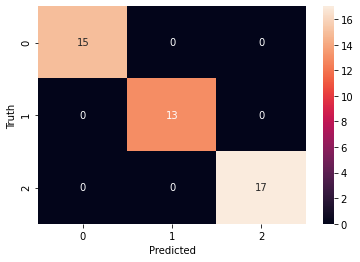

In [18]:
import seaborn as sns
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Decision Tree

In [19]:
model_dt= DecisionTreeClassifier( min_samples_leaf= 2, min_samples_split= 13)
model_dt.fit(X_train, y_train)
predictions_dt= model_dt.predict(X_test)
print('Accuracy of Decision Tree is:', metrics.accuracy_score(y_test, predictions_dt))

Accuracy of Decision Tree is: 0.9555555555555556


In [20]:
cm_dt= metrics.confusion_matrix(y_test, predictions_dt)
cm_dt

array([[15,  0,  0],
       [ 0, 13,  0],
       [ 0,  2, 15]])

Text(33.0, 0.5, 'Truth')

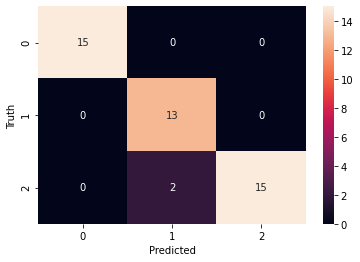

In [21]:
import seaborn as sns
sns.heatmap(cm_dt, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Support Vector Machine

In [27]:
model_svc= SVC(kernel= 'linear')
model_svc.fit(X_train, y_train)
predictions_svc= model_svc.predict(X_test)
print('Accuracy of Support Vector Machine is:', metrics.accuracy_score(y_test, predictions_svc))

Accuracy of Support Vector Machine is: 0.9555555555555556


### Random Forest Classifier

In [25]:
model_rf= RandomForestClassifier(n_estimators= 15, min_samples_leaf= 2, min_samples_split= 13)
model_rf.fit(X_train, y_train)
predictions_rf= model_rf.predict(X_test)
print('Accuracy of Random Forest is:', metrics.accuracy_score(y_test, predictions_rf))

Accuracy of Random Forest is: 0.9777777777777777


Many of the classification models resulted in high accuracy for our dataset, but every time the accuracy got changed when we executed train_test_split method.
So to evaluate the overall model performance we should use Cross validation technique.

## Cross Validation

In [37]:
from sklearn.model_selection import cross_val_score, KFold
import numpy as np
kf= KFold(5,True,1)

In [40]:
lr_score= cross_val_score(model_lr, X, y, cv= kf, scoring= 'accuracy')
lr_mean= np.mean(lr_score)
lr_mean

0.96

In [41]:
dt_score= cross_val_score(model_dt, X, y, cv= kf, scoring= 'accuracy')
dt_mean= np.mean(dt_score)
dt_mean

0.9266666666666667

In [42]:
svm_score= cross_val_score(model_svc, X, y, cv= kf, scoring= 'accuracy')
svc_mean= np.mean(svm_score)
svc_mean

0.9666666666666668

In [43]:
rf_score= cross_val_score(model_rf, X, y, cv= kf, scoring= 'accuracy')
rf_mean= np.mean(rf_score)
rf_mean

0.9466666666666667

So we can conclude that for Iris data set Support vector machine and Logistic regression models performed quite well.